In [45]:
# Imports
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [4]:

# get digicel files as a DataFrame
digicel_df=pd.read_csv("/Users/prakashranjan/Desktop/python/Digicel_Report_2017.csv")

# preview the data
digicel_df.head()

,SEGM,CHARGEDMSISDN,ACTIVE_DAYS,AMT,TOTAL_LOCAL_VOICE_REV,DIGI_VOICE_AMT,DIGI_VOICE_DUR_MIN,DIGI_VOICE_CNT,FREE_MTS,FREE_MTS_SUBS,...,INTER_CALL_CNT,INTER_VOICE_AMT,INTER_DUR_MIN,INTER_SMS_CNT,INTER_SMS_AMT,DATA_BUND_AMT,BIMA_CREDIT_SUBSCR_CNT,BIMA_CREDIT_AMT,BIMA_DEBIT_SUBSCR_CNT,BIMA_DEBIT_AMT
0,A,67570359463,30,246.106667,0.01,0.01,113.666667,56,113.650000,Y,...,0,0.0,0.0,0,0.0,207,0,0,29,15.66
1,A,67570360936,30,177.960000,17.74,16.61,458.850000,201,413.350000,Y,...,0,0.0,0.0,0,0.0,138,0,0,0,0.00
2,A,67570358616,30,231.748334,9.81,9.77,521.300000,217,461.266667,Y,...,0,0.0,0.0,0,0.0,165,0,0,0,0.00
3,A,67570358717,30,237.170000,50.63,50.63,126.383333,97,41.800000,Y,...,0,0.0,0.0,0,0.0,131,0,0,1,1.08
4,A,67570336085,30,125.218333,13.60,13.60,337.083333,268,281.550000,Y,...,0,0.0,0.0,0,0.0,67,0,0,34,19.98


In [5]:
digicel_df.info()
print("----------------------------")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 77 columns):
SEGM                           50 non-null object
CHARGEDMSISDN                  50 non-null int64
ACTIVE_DAYS                    50 non-null int64
AMT                            50 non-null float64
TOTAL_LOCAL_VOICE_REV          50 non-null float64
DIGI_VOICE_AMT                 50 non-null float64
DIGI_VOICE_DUR_MIN             50 non-null float64
DIGI_VOICE_CNT                 50 non-null int64
FREE_MTS                       50 non-null float64
FREE_MTS_SUBS                  50 non-null object
FREE_OFFPEAK_SECS              50 non-null int64
FREE_PEAK_SECS                 50 non-null int64
CHAR_OFFPEAK_SECS              50 non-null int64
CHAR_PEAK_SECS                 50 non-null int64
TOT_PEAK_AMT                   50 non-null float64
TOT_OFFPEAK_AMT                50 non-null float64
FREE_SECS                      50 non-null int64
CHAR_AMT                       50 non-null float

In [6]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))


In [7]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = digicel_df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    

In [8]:

print(digicel_df.shape)
digicel_df.info()
print("----------------------------")



(50, 77)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 77 columns):
SEGM                           50 non-null object
CHARGEDMSISDN                  50 non-null int64
ACTIVE_DAYS                    50 non-null int64
AMT                            50 non-null float64
TOTAL_LOCAL_VOICE_REV          50 non-null float64
DIGI_VOICE_AMT                 50 non-null float64
DIGI_VOICE_DUR_MIN             50 non-null float64
DIGI_VOICE_CNT                 50 non-null int64
FREE_MTS                       50 non-null float64
FREE_MTS_SUBS                  50 non-null object
FREE_OFFPEAK_SECS              50 non-null int64
FREE_PEAK_SECS                 50 non-null int64
CHAR_OFFPEAK_SECS              50 non-null int64
CHAR_PEAK_SECS                 50 non-null int64
TOT_PEAK_AMT                   50 non-null float64
TOT_OFFPEAK_AMT                50 non-null float64
FREE_SECS                      50 non-null int64
CHAR_AMT                       50 non-n

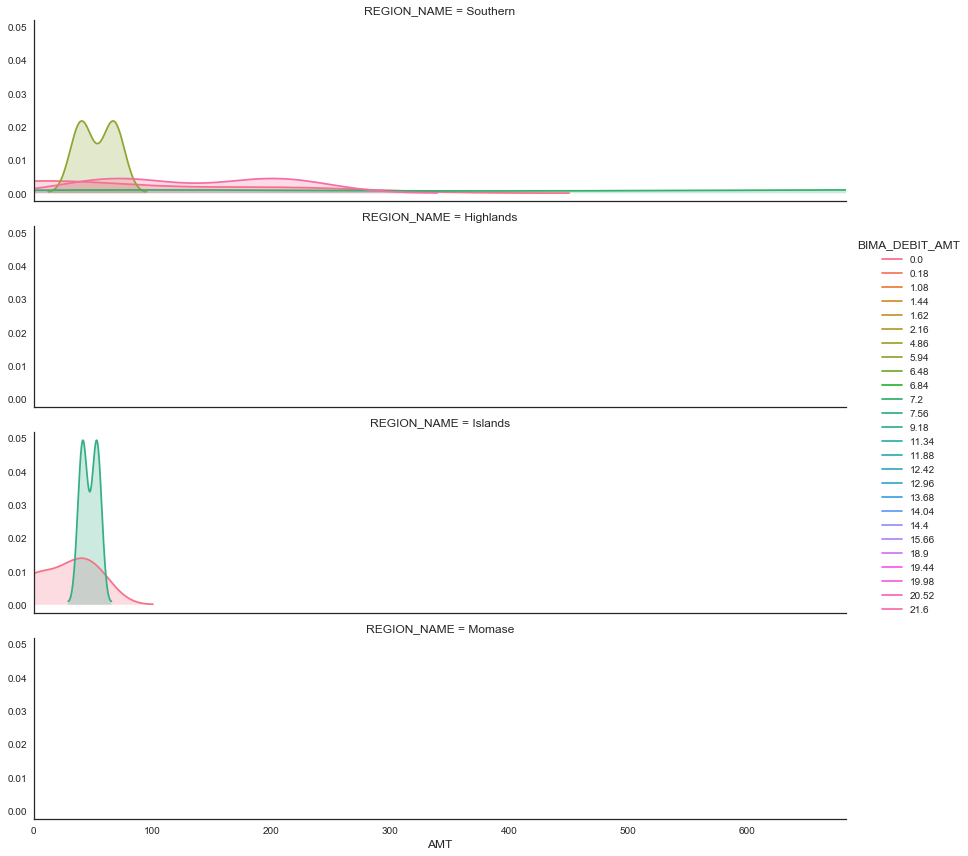

In [36]:
digicel_df.describe()
# Plot distributions of Age of passangers who survived or did not survive
plot_distribution( digicel_df , var = 'AMT' , target = 'BIMA_DEBIT_AMT' , row = 'REGION_NAME' )

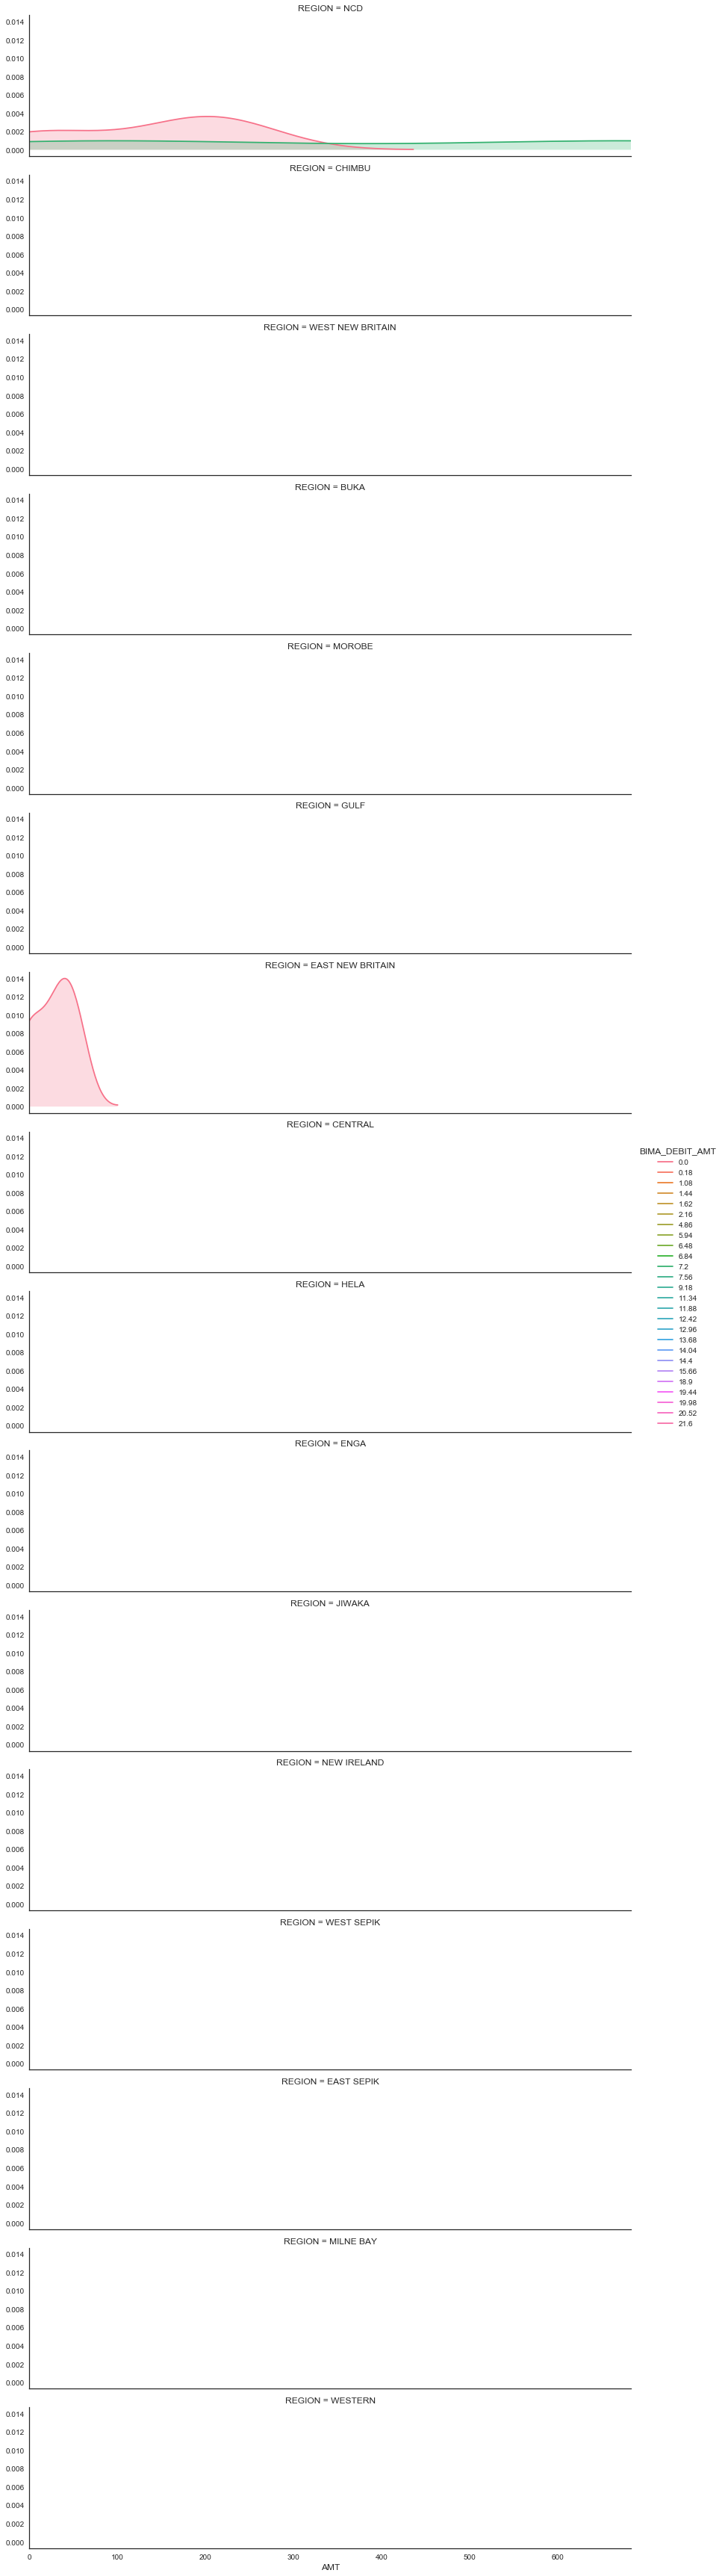

In [37]:
digicel_df = digicel_df.convert_objects(convert_numeric=True)
digicel_df.convert_objects(convert_numeric=True)
digicel_df.dtypes
digicel_df.convert_objects(convert_numeric=True).dtypes
# Plot distributions 
plot_distribution( digicel_df , var = 'AMT' , target = 'BIMA_DEBIT_AMT' , row = 'REGION' )



,CHARGEDMSISDN,ACTIVE_DAYS,AMT,TOTAL_LOCAL_VOICE_REV,DIGI_VOICE_AMT,DIGI_VOICE_DUR_MIN,DIGI_VOICE_CNT,FREE_MTS,FREE_OFFPEAK_SECS,FREE_PEAK_SECS,...,INTER_CALL_CNT,INTER_VOICE_AMT,INTER_DUR_MIN,INTER_SMS_CNT,INTER_SMS_AMT,DATA_BUND_AMT,BIMA_CREDIT_SUBSCR_CNT,BIMA_CREDIT_AMT,BIMA_DEBIT_SUBSCR_CNT,BIMA_DEBIT_AMT
count,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.0,50.000000,50.000000
mean,6.757032e+10,22.160000,82.521600,14.107000,13.441400,146.560333,79.360000,113.147333,791.800000,3320.44000,...,0.020000,0.008800,0.004333,0.060000,0.021000,36.720000,0.0,0.0,14.460000,7.549200
std,5.280305e+04,9.051688,110.085695,20.345076,19.896944,166.933912,87.270576,137.251450,1334.754216,4262.53453,...,0.141421,0.062225,0.030641,0.424264,0.148492,47.366155,0.0,0.0,13.763617,7.183672
min,6.757022e+10,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,6.757026e+10,15.500000,18.282917,1.222500,1.152500,9.454167,8.750000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.0,1.000000,0.405000
50%,6.757034e+10,26.000000,52.330833,6.130000,5.805000,98.591667,54.500000,45.033333,54.000000,1672.50000,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.0,0.0,11.000000,6.660000
75%,6.757036e+10,29.000000,90.541251,14.720000,14.320000,199.133333,97.750000,166.312500,852.000000,5789.25000,...,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,0.0,0.0,28.750000,12.960000
max,6.757036e+10,30.000000,683.011667,79.880000,79.710000,630.916667,318.000000,461.266667,5359.000000,15985.00000,...,1.000000,0.440000,0.216667,3.000000,1.050000,207.000000,0.0,0.0,37.000000,21.600000


In [46]:
import numpy
numpy.var(digicel_df, axis=None, dtype=None, out=None, ddof=0)


CHARGEDMSISDN                  2.732399e+09
ACTIVE_DAYS                    8.029440e+01
AMT                            1.187648e+04
TOTAL_LOCAL_VOICE_REV          4.056437e+02
DIGI_VOICE_AMT                 3.879706e+02
DIGI_VOICE_DUR_MIN             2.730959e+04
DIGI_VOICE_CNT                 7.463830e+03
FREE_MTS                       1.846120e+04
FREE_OFFPEAK_SECS              1.745937e+06
FREE_PEAK_SECS                 1.780582e+07
CHAR_OFFPEAK_SECS              5.532767e+05
CHAR_PEAK_SECS                 2.044821e+06
TOT_PEAK_AMT                   1.516444e+02
TOT_OFFPEAK_AMT                8.302277e+00
FREE_SECS                      1.392312e+07
CHAR_AMT                       4.348527e+01
CHAR_SECS                      1.133118e+06
TOPUP_CNT                      0.000000e+00
TOPUP_AMT                      0.000000e+00
TOTAL_SMS_ONNET_REV            1.398253e+01
SMS_BUND_REV                   4.868582e+01
DATA_OOB_AMT                   7.853812e+01
OFFNET_FREE_OFFPEAK_SECS       0

In [12]:
# get digicel files as a DataFrame
digicel1_df=pd.read_csv("/Users/prakashranjan/Desktop/python/Digicel_Report_2017_float.csv")

# preview the data
digicel1_df.head()

,ACTIVE_DAYS,AMT,TOTAL_LOCAL_VOICE_REV,DIGI_VOICE_AMT,DIGI_VOICE_DUR_MIN,DIGI_VOICE_CNT,FREE_MTS,FREE_OFFPEAK_SECS,FREE_PEAK_SECS,CHAR_OFFPEAK_SECS,...,INTER_CALL_CNT,INTER_VOICE_AMT,INTER_DUR_MIN,INTER_SMS_CNT,INTER_SMS_AMT,DATA_BUND_AMT,BIMA_CREDIT_SUBSCR_CNT,BIMA_CREDIT_AMT,BIMA_DEBIT_SUBSCR_CNT,BIMA_DEBIT_AMT
0,30.0,246.106667,0.01,0.01,113.666667,56,113.650000,645,1651,1,...,0,0.0,0.0,0,0.0,207,0,0,29,15.66
1,30.0,177.960000,17.74,16.61,458.850000,201,413.350000,1855,15493,514,...,0,0.0,0.0,0,0.0,138,0,0,0,0.00
2,30.0,231.748334,9.81,9.77,521.300000,217,461.266667,3123,15985,801,...,0,0.0,0.0,0,0.0,165,0,0,0,0.00
3,30.0,237.170000,50.63,50.63,126.383333,97,41.800000,0,399,922,...,0,0.0,0.0,0,0.0,131,0,0,1,1.08
4,30.0,125.218333,13.60,13.60,337.083333,268,281.550000,429,9982,122,...,0,0.0,0.0,0,0.0,67,0,0,34,19.98


In [106]:
digicel1_df.dtypes
y=digicel1_df.BIMA_DEBIT_AMT
x=digicel1_df.drop(['BIMA_DEBIT_AMT','BIMA_DEBIT_SUBSCR_CNT'], axis=1)
x=x.values
y=y.values
x=x.astype(int)
y=y.astype(int)
print y

[15  0  0  1 19 14  7 19  7 21 14 20 21  1 12  5 19 18  1 15  6 13  7 11  7
  0  7  6 12  2  5  9  0  7 12  1 11  4  0  6  0  1  0  0  2  0  0  0  0  0]


[ 71.66  89.82  93.93  96.38  98.36  99.35]


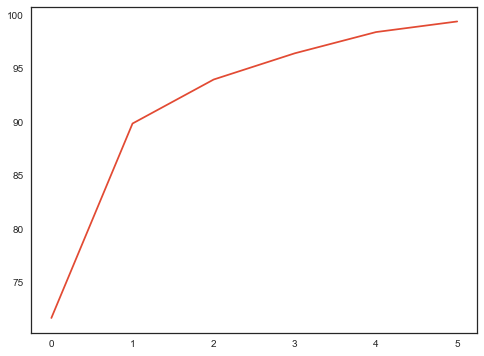

In [107]:
from sklearn import decomposition

pca = decomposition.PCA()
pca.n_components = 6
xproj = pca.fit_transform(x)
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print var1
plt.plot(var1)

In [108]:

print(x.shape)
print(xproj.shape)
print(y.shape)


(50, 63)
(50, 6)
(50,)


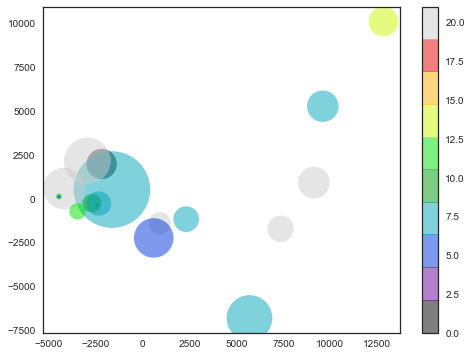

In [109]:
plt.scatter(xproj[:, 0], xproj[:, 1],xproj[:, 2] ,c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

In [113]:
#Randomze data sets
indices=np.random.permutation(len(x))
x_train=x[:-20]
y_train=y[:-20]

x_test=x[-20:]
y_test=y[-20:]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(30, 63)
(20, 63)
(30,)
(20,)


In [114]:


from sklearn import svm
clf=svm.SVC()
clf.fit(x_train,y_train)

accuracy = clf.score(x_test,y_test)
print(accuracy)

0.05


In [117]:
from sklearn import linear_model
clf=linear_model.SGDClassifier()
clf.fit(x_train,y_train)
accuracy = clf.score(x_test,y_test)
print(accuracy)

0.2


In [118]:
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LinearRegression
from sklearn.linear_model           import LogisticRegression


clf = LinearRegression()
clf.fit(x_train,y_train)
print("LinearRegression")
print(clf.predict(x_test))
print(y_test)
accuracy = clf.score(x_test,y_test)
print(accuracy)

LinearRegression
[ 58.92647348  14.15689165   5.70786314   7.18674245  12.90178023
   1.495517     7.78520469 -24.94522426 -29.06145933   1.41032454
 -10.88747912  -2.61879287  -7.17110894  -2.46149404  -1.56896405
  -2.12371663  -2.54332428  -1.05132985  -3.10881491   3.39432738]
[ 5  9  0  7 12  1 11  4  0  6  0  1  0  0  2  0  0  0  0  0]
-14.8723373994


In [120]:
from sklearn import naive_bayes
clf=naive_bayes.GaussianNB()
clf.fit(x_train,y_train)
accuracy = clf.score(x_test,y_test)
print(accuracy)

0.05


In [121]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
accuracy = clf.score(x_test,y_test)
print(accuracy)

0.05


In [122]:
from sklearn import linear_model
clf=linear_model.SGDRegressor()
clf.fit(x_train,y_train)
accuracy = clf.score(x_test,y_test)
print(accuracy)

-1.13458647438e+32


In [124]:
from sklearn import neighbors
clf=neighbors.KNeighborsRegressor()
clf.fit(x_train,y_train)
accuracy = clf.score(x_test,y_test)
print(accuracy)

-6.18244028405


In [130]:
from sklearn import cluster
clf=cluster.KMeans(n_clusters=5)
clf.fit(x_train,y_train)
accuracy = clf.score(x_test,y_test)
print(accuracy)


-112602280.368


AttributeError: 'numpy.ndarray' object has no attribute 'values'